In [14]:
import pandas as pd
df = pd.read_csv('income.csv')

In [15]:
import matplotlib.pyplot as plt

In [16]:
df.head(1)

,Name,Age,Income($)
0,Rob,27,70000


In [17]:
x = df.Age

In [18]:
y = df.drop(['Name', 'Age'], axis='columns')

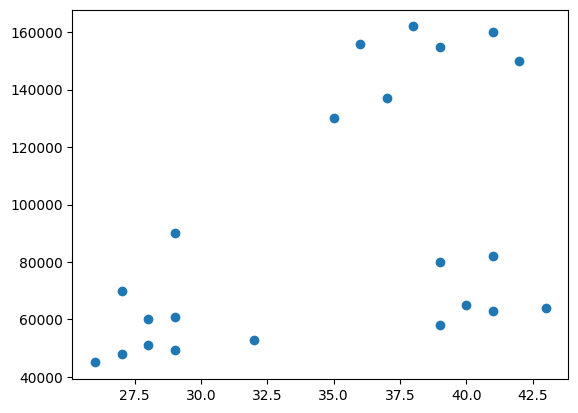

In [19]:
plt.scatter(x,y)

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters = 3)

In [22]:
model

KMeans(n_clusters=3)

In [23]:
y_pred = model.fit_predict(df[['Age', 'Income($)']])

C:\Users\s_nas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [25]:
df['c'] = y_pred

In [26]:
df

,Name,Age,Income($),c
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [27]:
model.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [28]:
df1 = df[df.c == 0]
df2 = df[df.c == 1]
df3 = df[df.c == 2]

In [28]:
df1

,Name,Age,Income($),c
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


In [29]:
df2

,Name,Age,Income($),c
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [30]:
df3

,Name,Age,Income($),c
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


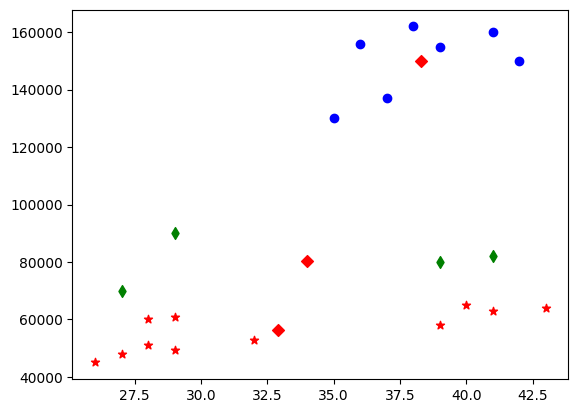

In [35]:
plt.scatter(df1.Age, df1['Income($)'], c='r', marker='*')
plt.scatter(df2.Age, df2['Income($)'], c='b', marker='o')
plt.scatter(df3.Age, df3['Income($)'], c='g', marker='d')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'r', marker = "D")

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
s = MinMaxScaler()

In [38]:
s.fit(df[['Income($)']])

MinMaxScaler()

In [39]:
df['Income($)'] = s.transform(df[['Income($)']])

In [40]:
s.fit(df[['Age']])
df['Age'] = s.transform(df[['Age']])

In [41]:
df

,Name,Age,Income($),c
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [42]:
model = KMeans(n_clusters=3)

In [43]:
y_pred = model.fit_predict(df[['Age', 'Income($)']])

C:\Users\s_nas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [45]:
df['cluster'] = y_pred

In [46]:
df1 = df[df.c == 0]
df2 = df[df.c == 1]
df3 = df[df.c == 2]

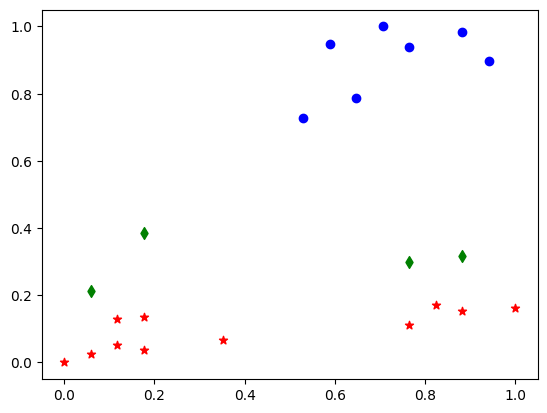

In [47]:
plt.scatter(df1.Age, df1['Income($)'], c='r', marker='*')
plt.scatter(df2.Age, df2['Income($)'], c='b', marker='o')
plt.scatter(df3.Age, df3['Income($)'], c='g', marker='d')